#  Directional Derivatives

---

## **1. Definition**

For a function $f(x, y)$, the **directional derivative** in the direction of a unit vector $\mathbf{u} = (\cos \theta, \sin \theta)$ is defined as

$$
D_{\mathbf{u}} f(x, y) =
f_x(x, y)\cos\theta + f_y(x, y)\sin\theta
$$

where $f_x$ and $f_y$ denote the partial derivatives of $f$ with respect to $x$ and $y$ respectively.

---

## **2. Example Function**

Consider the function

$$
f(x, y) = \frac{yx^2}{x^2 + y^2}.
$$

We are interested in its behavior near the origin $(0,0)$.

---

## **3. Partial Derivative with Respect to $x$**

We first compute the partial derivative with respect to $x$:

$$
f_x(x, y) = \frac{\partial}{\partial x}\left(\frac{yx^2}{x^2 + y^2}\right).
$$

Then evaluate this along the line passing through the origin making an angle $\theta$ with the $x$-axis, i.e., substitute

$$
x = u\cos\theta, \qquad y = u\sin\theta.
$$

After simplification:

$$
f_x(u\cos\theta,\, u\sin\theta) = 2\cos\theta\,\sin^3\theta.
$$

This expression depends on the **direction $\theta$** but **not** on the distance $u$ from the origin.

---

## **4. Continuity Discussion**

Since $f_x$ varies with direction $\theta$, it is not continuous in a neighborhood of the origin.

That is, the partial derivative $f_x$ depends on the direction of approach toward the origin, implying that $f$ is **not differentiable** at $(0,0)$ even though it may have partial derivatives there.

---

## **5. Partial Derivative with Respect to $y$**

Similarly, for the partial derivative with respect to $y$:

$$
f_y(x, y) = \frac{\partial}{\partial y}\left(\frac{yx^2}{x^2 + y^2}\right).
$$

Evaluating along the same line $x = u\cos\theta$, $y = u\sin\theta$ gives:

$$
f_y(u\cos\theta,\, u\sin\theta) = \cos^2\theta\,\cos(2\theta).
$$

Again, the result depends on $\theta$, confirming direction-dependence and non-continuity of partial derivatives at the origin.

---

## **6. Conclusion**

- The partial derivatives $f_x$ and $f_y$ of $f(x, y) = \dfrac{yx^2}{x^2 + y^2}$ exist along lines through the origin.  
- However, both depend on the **direction $\theta$** and not on the distance $u$.  
- Therefore, these partial derivatives are **not continuous at the origin**, and $f$ is **not differentiable** there.

---

### Key Takeaway

Directional dependence of partial derivatives implies **lack of differentiability**, even if each partial derivative exists at the point.

## Visualizing 3-D Directional Derivatives

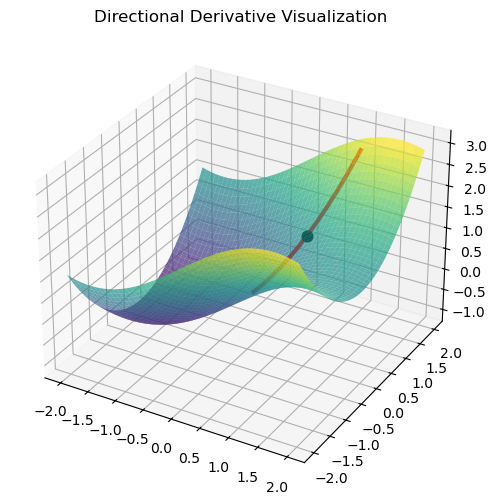

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define surface
def f(xy):
    x, y = xy
    return np.sin(x) + 0.5*y**2

# Grid for plotting
xs = np.linspace(-2, 2, 50)
ys = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(xs, ys)
Z = np.sin(X) + 0.5*Y**2

# Point a and direction v
a = np.array([0.5, 1.0])
v = np.array([1, 2])
v = v / np.linalg.norm(v)

# Curve through a in direction v
t = np.linspace(-1, 1, 100)
curve_x = a[0] + t * v[0]
curve_y = a[1] + t * v[1]
curve_z = np.sin(curve_x) + 0.5*(curve_y**2)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7)
ax.plot(curve_x, curve_y, curve_z, color='r', linewidth=3)
ax.scatter(*a, f(a), color='k', s=60)

plt.title("Directional Derivative Visualization")
plt.show()

## Testing Differentiability Using Directional Derivatives

A function may have all directional derivatives but still not be differentiable (e.g., $f(x,y)=\sqrt{|xy|}$: 

Test directional derivatives in many directions:

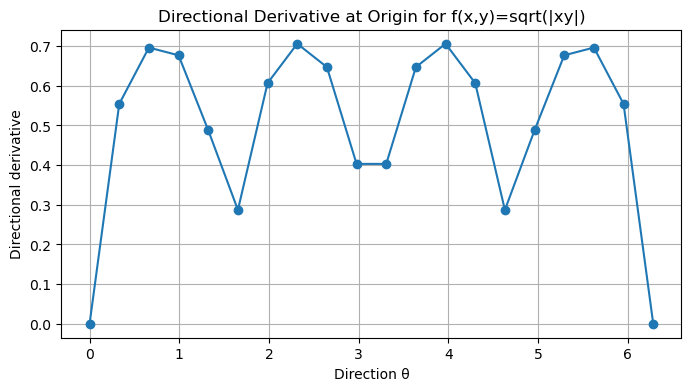

In [4]:
def f_bad(x):
    return np.sqrt(abs(x[0]*x[1]))

def dir_derivative_at_origin(v, h=1e-6):
    v = v/np.linalg.norm(v)
    return (f_bad(h*v) - f_bad(np.zeros(2))) / h

# Try many directions
thetas = np.linspace(0, 2*np.pi, 20)
values = []

for th in thetas:
    v = np.array([np.cos(th), np.sin(th)])
    values.append(dir_derivative_at_origin(v))

plt.figure(figsize=(8,4))
plt.plot(thetas, values, marker='o')
plt.title("Directional Derivative at Origin for f(x,y)=sqrt(|xy|)")
plt.xlabel("Direction θ")
plt.ylabel("Directional derivative")
plt.grid(True)
plt.show()